# Importeer data


In [241]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np 
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
db = pd.read_csv(path + "/Iris.csv")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\jagro\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [242]:

db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Decision Tree

In [243]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'species' column
db_encoded = pd.get_dummies(db, columns=['species'])

# Prepare features and labels
X_df = db_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y_df = db_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

list(X_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# MAX DEPTH

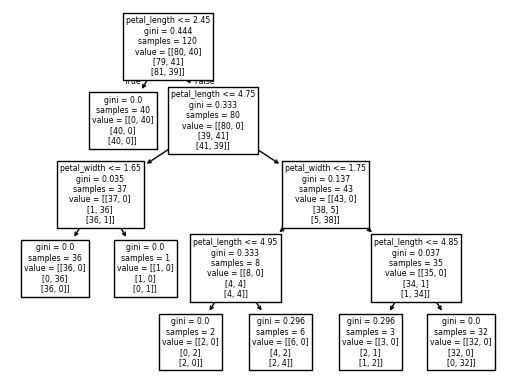

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=4)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=X_df.columns)
plt.show()

In [245]:
# Create a DataFrame for predicted labels with appropriate column names
predicted_df = pd.DataFrame(dtree.predict(X_test), columns=y_test.columns)
predicted_df = predicted_df.add_prefix('Predicted_')

# Concatenate true and predicted labels for comparison
model_results_frame = pd.concat([y_test.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)
model_results_frame

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Predicted_species_Iris-setosa,Predicted_species_Iris-versicolor,Predicted_species_Iris-virginica
0,False,True,False,False,True,False
1,True,False,False,True,False,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False
4,False,True,False,False,True,False
5,True,False,False,True,False,False
6,False,True,False,False,True,False
7,False,False,True,False,False,True
8,False,True,False,False,True,False
9,False,True,False,False,True,False


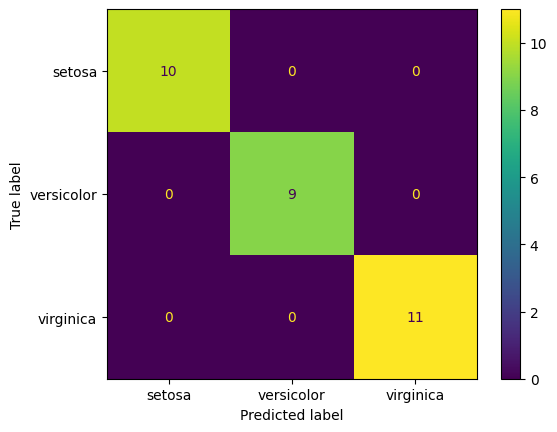

In [246]:
# Convert one-hot encoded columns to single label values
true_labels = np.argmax(model_results_frame.iloc[:, :3].values, axis=1)
pred_labels = np.argmax(model_results_frame.iloc[:, 3:].values, axis=1)

confusion_matrix = metrics.confusion_matrix(true_labels, pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['setosa', 'versicolor', 'virginica'])

cm_display.plot()
plt.show()

In [247]:
best_accuracy = 0
best_depth = 0

max_depths = range(1, 40)
for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f"Max depth: {depth}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n🎯 Highest Accuracy: {best_accuracy:.4f} at Max Depth: {best_depth}")

Max depth: 1, Accuracy: 0.6333
Max depth: 2, Accuracy: 0.9667
Max depth: 3, Accuracy: 0.9667
Max depth: 4, Accuracy: 1.0000
Max depth: 5, Accuracy: 1.0000
Max depth: 6, Accuracy: 1.0000
Max depth: 7, Accuracy: 1.0000
Max depth: 8, Accuracy: 1.0000
Max depth: 9, Accuracy: 1.0000
Max depth: 10, Accuracy: 1.0000
Max depth: 11, Accuracy: 1.0000
Max depth: 12, Accuracy: 1.0000
Max depth: 13, Accuracy: 1.0000
Max depth: 14, Accuracy: 1.0000
Max depth: 15, Accuracy: 1.0000
Max depth: 16, Accuracy: 1.0000
Max depth: 17, Accuracy: 1.0000
Max depth: 18, Accuracy: 1.0000
Max depth: 19, Accuracy: 1.0000
Max depth: 20, Accuracy: 1.0000
Max depth: 21, Accuracy: 1.0000
Max depth: 22, Accuracy: 1.0000
Max depth: 23, Accuracy: 1.0000
Max depth: 24, Accuracy: 1.0000
Max depth: 25, Accuracy: 1.0000
Max depth: 26, Accuracy: 1.0000
Max depth: 27, Accuracy: 1.0000
Max depth: 28, Accuracy: 1.0000
Max depth: 29, Accuracy: 1.0000
Max depth: 30, Accuracy: 1.0000
Max depth: 31, Accuracy: 1.0000
Max depth: 32, Ac

In [248]:
metrics.accuracy_score(true_labels, pred_labels)

1.0

# Logic Regression

In [249]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [250]:
db
X = db.drop(columns=['petal_length'])
#one-hot encode teh 'species' column
X = pd.get_dummies(X, columns=['species'])
X
y = db['petal_length']
y


0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.30,
    random_state = 40
)

In [252]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
reg_model

LinearRegression()

In [253]:
y_pred= reg_model.predict(X_test)
y_pred

array([1.14138782, 4.097731  , 5.52795984, 6.15919683, 4.03366229,
       5.47719856, 4.6336371 , 4.05473879, 3.97368858, 1.55566809,
       3.9609853 , 1.30758325, 1.46335795, 5.22478367, 3.98061846,
       5.79796039, 5.30727723, 5.58914185, 4.83072561, 3.85885858,
       5.55764463, 6.20874982, 4.074607  , 1.52537916, 4.01379409,
       1.83608936, 1.02716198, 5.36990259, 1.37881689, 3.89752074,
       4.24857151, 1.67073314, 1.53603494, 1.55627224, 1.28650675,
       5.50543999, 1.23574546, 1.10044311, 5.08050395, 1.76545987,
       1.24495789, 4.75949197, 5.12181775, 5.89864376, 5.76310636])

In [254]:
prediction_df = pd.DataFrame(y_pred)
prediction_df = prediction_df.rename(columns = {0 : 'Predicted_length'}) 
prediction_df

,Predicted_length
0,1.141388
1,4.097731
2,5.527960
3,6.159197
4,4.033662
5,5.477199
6,4.633637
7,4.054739
8,3.973689
9,1.555668


In [255]:
# Concatenate y_test and prediction_df for comparison
y_test_prediction_merge = pd.concat([y_test.reset_index(drop=True), prediction_df], axis=1)
y_test_prediction_merge

,petal_length,Predicted_length
0,1.3,1.141388
1,4.5,4.097731
2,5.3,5.527960
3,6.7,6.159197
4,4.0,4.033662
5,5.6,5.477199
6,4.5,4.633637
7,4.2,4.054739
8,4.5,3.973689
9,1.4,1.555668


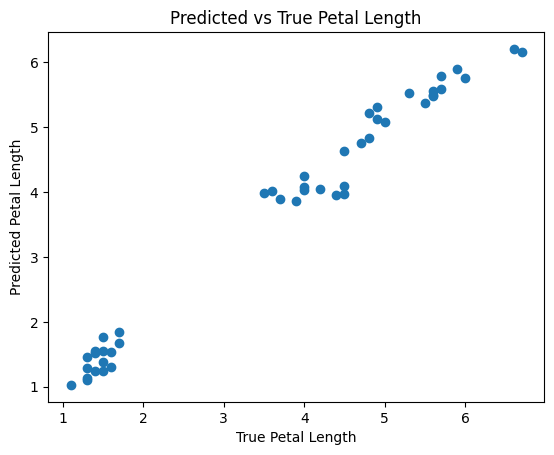

In [256]:
plt.scatter(y_test_prediction_merge['petal_length'], y_test_prediction_merge['Predicted_length'])
plt.xlabel('True Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Predicted vs True Petal Length')
plt.show()

In [257]:
#check the accuracy of the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))




Mean Absolute Error: 0.19179467558250177
Mean Squared Error: 0.05851337601285546
Root Mean Squared Error: 0.24189538237191602


In [258]:
# Display the accuracy of the binary classification model
from sklearn.metrics import accuracy_score

# Create true binary labels for 'Long' (petal_length > 3)
y_test_prediction_merge['True_Long'] = y_test_prediction_merge['petal_length'].apply(lambda x: 'True' if x > 3 else 'False')

# Create predicted binary labels for 'Long' (Predicted_length > 3)
y_test_prediction_merge['Predicted_Long'] = y_test_prediction_merge['Predicted_length'].apply(lambda x: 'True' if x > 3 else 'False')

# Calculate accuracy
accuracy_long = accuracy_score(y_test_prediction_merge['True_Long'], y_test_prediction_merge['Predicted_Long'])
accuracy_long

1.0